<a href="https://colab.research.google.com/github/srsjoe/Advertising/blob/main/COVID19_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

SARS-CoV-2 also known as covid 19 is a respiratory virus that was first reported in Wuhan, 
China. The first case of Covid-19 was reported in US was on January 21, 2020. As of November 
9, 2022, 1,070,947 COVID-19-related deaths have been reported in the United States. The goal 
of this project is to analyze the number of deaths vs cases, non-cases, and reported cases of 
people infected, in different parts of the world, most likely in the US since most of our data will 
be based on US soil. We will analyze and classify trends of covid 19 from datasets and use that 
to predict and visualize our findings so that we can prevent further spread. Kevin Ramon will 
work on filters for the data at hand, to see what data should be used to determine changes in 
each situation such as COVID -19, and Sakib Joseph will work on codes that develop a data 
pattern showing mortality rate, patterns, or spikes in cases using graphs with modules. The 
Python Libraries that we’ll use are Pandas, Numpy, Matplotlib, Seaborn, and Plotly.

Links and References: 
https://github.com/nytimes/covid-19-data

https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv



# Environment Set up



Import all required libraries that are needed for data analysis

In [100]:
# Python Libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [101]:
# Imported data from 
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [102]:
df.head()
# This will return the first 5 rows 

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [103]:
df.shape
# Return a tuple representing the dimensionality of the DataFrame.

(55950, 5)

In [104]:
df.columns
# The column labels of the DataFrame.

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

#  Data Analysis

Analyzing New York state data for Covid 19

In [105]:
ny_df = df[df['state']=='New York']

In [106]:
ny_df.head()
# Returns the first 5 rowes of New York state data for Covid 19

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [107]:
ny_df.shape
# represents the dimensionality of the DataFrame of New York state data for Covid 19

(1011, 5)

In [108]:
ny_df.tail()
# Returns the last 5 rows of New York state data for Covid 19

,date,state,fips,cases,deaths
55704,2022-12-02,New York,36,6388095,76783
55760,2022-12-03,New York,36,6390906,76783
55816,2022-12-04,New York,36,6392764,76783
55872,2022-12-05,New York,36,6404665,76805
55928,2022-12-06,New York,36,6409790,76842


In [109]:
#first death in NY
first_ny_death = ny_df[ny_df['deaths']!=0]
first_ny_death.head()
# Returns the first 5 rows where death count is greater than 0

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


In [110]:
#total number of cases
ny_df['cases'].max()
# Return the maximum of the values over the requested axis.

6409790

In [111]:
# not a correct way of calculating total count bcoz data is cumulative
ny_df['cases'].sum()
# Return the sum of the values over the requested axis.

2768061550

Finding new covid 19 cases on daily basis (new cases added everyday)

In [112]:
#new cases for NY
# type(ny_df['cases'])

newcase = []
previuos_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [113]:
ny_df['new_cases'] = newcase

<ipython-input-113-67a698e487e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_df['new_cases'] = newcase


In [114]:
newcase = []
previuos_case = 0
for index, row in ny_df.iterrows():
  current_case = row['deaths']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [115]:
ny_df['new_deaths'] = newcase

<ipython-input-115-a0f068121472>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_df['new_deaths'] = newcase


In [116]:
ny_df.head(10)

,date,state,fips,cases,deaths,new_cases,new_deaths
246,2020-03-01,New York,36,1,0,1,0
261,2020-03-02,New York,36,1,0,0,0
276,2020-03-03,New York,36,2,0,1,0
293,2020-03-04,New York,36,11,0,9,0
313,2020-03-05,New York,36,22,0,11,0
338,2020-03-06,New York,36,44,0,22,0
369,2020-03-07,New York,36,89,0,45,0
404,2020-03-08,New York,36,106,0,17,0
440,2020-03-09,New York,36,142,0,36,0
478,2020-03-10,New York,36,173,0,31,0


In [117]:
ny_df.tail()

,date,state,fips,cases,deaths,new_cases,new_deaths
55704,2022-12-02,New York,36,6388095,76783,8059,24
55760,2022-12-03,New York,36,6390906,76783,2811,0
55816,2022-12-04,New York,36,6392764,76783,1858,0
55872,2022-12-05,New York,36,6404665,76805,11901,22
55928,2022-12-06,New York,36,6409790,76842,5125,37


In [118]:
ny_df['new_cases'].sum()

6409790

In [119]:
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']

In [120]:
type(ny_new_cases)

pandas.core.series.Series

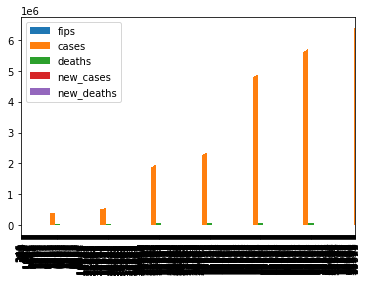

In [121]:
ny_df.plot(kind='bar')
# plots each data point as a discrete bar(barplot)

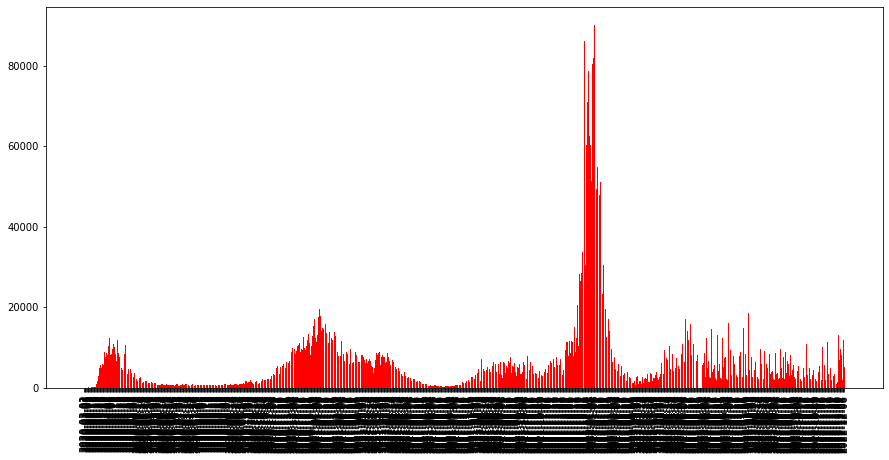

In [142]:
plt.figure(figsize=(15,7)) # Create a new figure, or activate an existing figure.
plt.bar(x=ny_dates, height =ny_new_cases, color='red') #Make a bar plot.
plt.xticks(rotation=90) #Get or set the current tick locations and labels of the x-axis.
plt.show() # Display all open figures.

In [140]:
)

<Figure size 720x360 with 0 Axes>

#  NY covid 19 data in last 7 days

In [149]:
ny_cases_7 = ny_df['cases'][-8:-1]
ny_deaths_7 = ny_df['new_deaths'] [-8:-1]
ny_dates_7 = ny_df['date'][-8:-1]
ny_new_cases_7 = ny_df['new_cases'][-8:-1]

In [150]:
# ny_dates_7

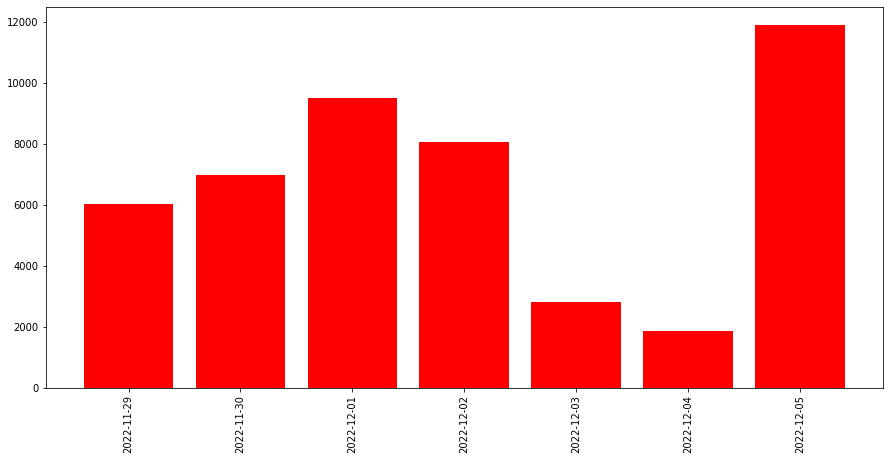

In [151]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_7, height=ny_new_cases_7, color='red')
plt.xticks(rotation=90) # Rotate X-Axis Tick Labels by 90 deg (rotation 90)
plt.show()

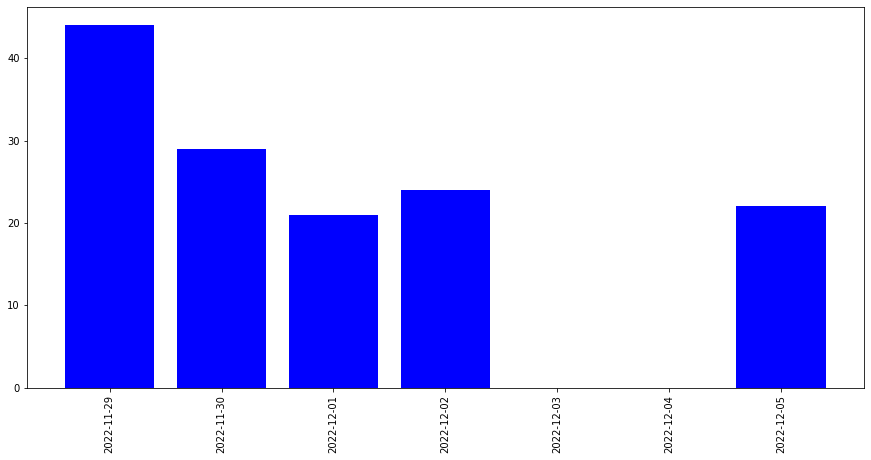

In [152]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_7, height=ny_deaths_7, color='blue')
plt.xticks(rotation=90)
plt.show()

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona

In [144]:
states = ['New York', 'California','Florida', 'Texas','Arizona']

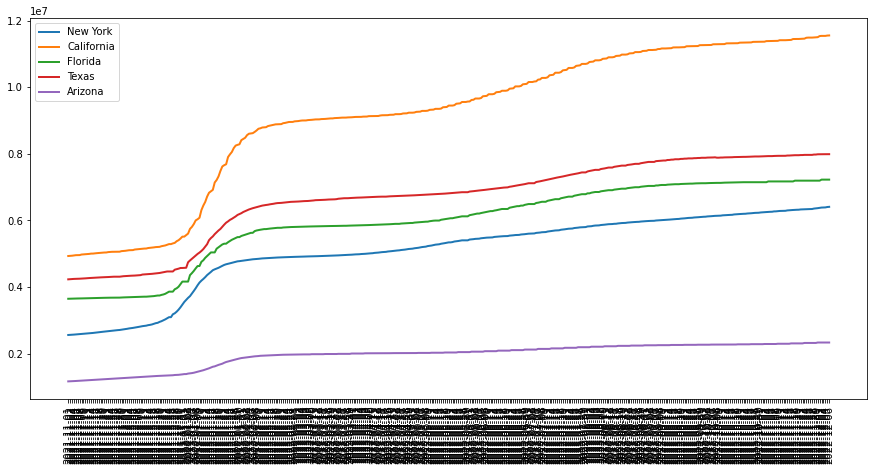

In [143]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2021-11-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)  # Place a legend on the Axes.
plt.show()


# Conclusion



Question: What are the death counts compared to cases in other states(CA,FL,TX,AZ) than NY ? Is the case number significantly higher than the death count ? Is the difference between case number and death count same in all other months of the pandemic?

